# Logistische Regression

#### Import der Bibliotheken und Utility-Funktionen

In [1]:
import imp
import os
import numpy as np
from sklearn import datasets

In [2]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

#### Import und Vorverarbeitung der Iris Daten

In [3]:
iris = datasets.load_iris()

In [4]:
f1 = 0
f2 = 1
X = iris.data[0:100, (f1, f2)]
#X = np.concatenate((iris.data[0:50, (f1, f2)], iris.data[50:100, (f1, f2)]))
#X = iris.data[50:150, (f1, f2)]
y = iris.target[0:100]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_train_std = X_train
X_test_std = X_test

#### Logistische Regression

In [7]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(random_state=0)

#### Training des Modells

In [8]:
logReg.fit(X_train_std, y_train)

LogisticRegression(random_state=0)

#### Vorhersage der Klassen

In [9]:
y_pred = logReg.predict(X_test_std)

#### Bewertung des Modells

In [10]:
print("Number of mislabeled points out of a total %d points : %d" % (X_test_std.shape[0],(y_test != y_pred).sum()))

Number of mislabeled points out of a total 30 points : 0


#### Plot der Entscheidungsgrenze

<class 'numpy.ndarray'>


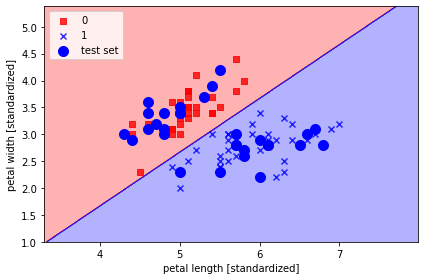

In [13]:
plot_decision_regions(
    X_train=X_train_std,
    X_test=X_test_std,
    y_train=y_train,
    y_test=y_test,
    classifier=logReg,
    xlabel='petal length [standardized]',
    ylabel='petal width [standardized]')
plt.savefig('log_regression', dpi=300)
plt.show();

#### Utility Functions

In [12]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X_train, X_test, y_train, y_test, classifier, xlabel, ylabel, resolution=0.02):
    
    print(type(X_test))
    
    if X_test is None:
        X = X_train
        y = y_train
        test_idx = None
    else:
        X = np.vstack((X_train, X_test))
        y = np.hstack((y_train, y_test))
        test_idx = range(y_train.shape[0], y_train.shape[0]+y_test.shape[0])

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    #edgecolor='black',
                    facecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c=colors[idx],
                    #edgecolor='black',
                    facecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc='upper left')
    plt.tight_layout()

def plot_history(hist1, hist2, label1, label2):
    epochs = range(1, len(hist1))
    hist1 = hist1[1:]
    hist2 = hist2[1:]
    # b+ is for "blue cross"
    plt.plot(epochs, hist1, 'b+', label=label1)
    # "bo" is for "blue dot"
    plt.plot(epochs, hist2, 'bo', label=label2)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()